# Clase 4: Evaluación y Corrección de Datos

## Introducción

La calidad de los datos es crucial para cualquier análisis o modelo predictivo. En esta clase, abordaremos cómo evaluar y corregir problemas comunes en los datos, como datos faltantes, incorrectos y con ruido. También veremos técnicas para transformar y preparar los datos para análisis posteriores.

## Datos faltantes

### Imputación de datos y valores nulos
La imputación es el proceso de reemplazar los datos faltantes con valores estimados. Existen varias técnicas de imputación, como:
- Imputación con la media, mediana o moda.
- Imputación utilizando métodos más sofisticados como KNN o regresión.

## Datos incorrectos y valores duplicados

### Identificación y Tratamiento de Valores Duplicados
Los valores duplicados pueden distorsionar los resultados del análisis y deben ser identificados y manejados adecuadamente.

## Variables Categóricas

### Codificación de variables categóricas
Las variables categóricas deben ser transformadas en variables numéricas antes de ser usadas en modelos predictivos. Las técnicas comunes incluyen:
- Codificación One-Hot
- Codificación de etiquetas

## Outliers

### Identificación y tratamiento de Outliers
Los outliers son valores que se desvían significativamente del resto de los datos. Pueden ser resultado de errores de medición o representar variaciones genuinas en los datos.
## Primera exploracion
Para poder identificar de una forma sencilla los outliers podríamos usar el metodo describe de pandas, lo que nos permitira tener una vision global de lo que pasa con los datos.

## Normalización y escalado

### Normalización y escalado
La normalización y el escalado son técnicas para ajustar el rango de los datos. Son especialmente importantes para algoritmos que son sensibles a las magnitudes de los datos, como los métodos de aprendizaje supervisado.

### Discretización
La discretización convierte variables continuas en categóricas. Esto puede ser útil para ciertos tipos de análisis.

## Transformaciones matemáticas

### Transformaciones matemáticas en Python
Las transformaciones matemáticas pueden incluir logaritmos, raíces cuadradas, exponenciales, entre otras. Estas transformaciones pueden ayudar a estabilizar la varianza y hacer que los datos se ajusten mejor a los supuestos de los modelos.



## Práctica

En esta sección, aprenderemos a aplicar las técnicas de evaluación y corrección de datos utilizando Python.

## Descripción dataset titanic
dataset de prediccion de la supervivencia en el Titanic

## Descripción de columnas

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Cargar el dataset titanic
df = sns.load_dataset("titanic")
print("DataFrame de ejemplo:")
print(df.head())


DataFrame de ejemplo:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Imputación de datos y valores Nulos

Vamos a identificar y manejar los datos faltantes en el conjunto de datos.


In [ ]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())
### TODO: Analiza la cantidad de valores faltantes antes de la imputación.
# ¿Qué columnas tienen más valores faltantes? ¿Por qué podría ser importante esta información?

# Imputar valores faltantes en la columna 'age' con la mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Imputar valores faltantes en la columna 'embark_town' con la moda
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Verificar que no hay valores faltantes
print("\nValores faltantes después de la imputación:")
print(df.isnull().sum())

### TODO: Verifica si hay alguna columna que aún tenga valores faltantes y explica por qué.
# Si existen columnas con valores faltantes, discute la importancia de decidir cómo manejarlos.

Valores faltantes por columna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Valores faltantes después de la imputación:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [ ]:
## TODO: Imputa los valores faltantes en la columna 'age' utilizando la media y compara los resultados.
# ¿Qué diferencias observas al usar la media en lugar de la mediana para la imputación?

### Identificación y tratamiento de valores duplicados

Vamos a identificar y manejar los valores duplicados en el conjunto de datos.


In [ ]:
# Codificación de etiquetas para la columna 'sex'
df['sex'] = df['sex'].astype('category').cat.codes

### TODO: Verifica los valores únicos en la columna 'sex' después de la codificación.
# ¿Qué códigos se asignaron a 'male' y 'female'?.


# Codificación One-Hot para la columna 'embark_town'
df = pd.get_dummies(df, columns=['embark_town'], drop_first=True)
### TODO: Verifica las nuevas columnas creadas después de la codificación one-hot.
# ¿Qué columnas se crearon? Utiliza print(df.columns) para ver las nuevas columnas.

### TODO: Compara la codificación One-Hot con la codificación de etiquetas.
# ¿En qué situaciones sería más adecuado utilizar una codificación sobre la otra?

### TODO: Realiza una codificación One-Hot para la columna 'class' sin eliminar la primera columna (drop_first=False).
# ¿Qué diferencias observas en el DataFrame y en los resultados del análisis?

print("\nDataFrame después de la codificación de variables categóricas:")
print(df.head())



DataFrame después de la codificación de variables categóricas:
   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male deck alive  alone  embark_town_Queenstown  \
0        True  NaN    no  False                   False   
1       False    C   yes  False                   False   
2       False  NaN   yes   True                   False   
3       False    C   yes  False                   False   
4        True  NaN    no   True                   False   

   embark_town_Southampton  
0                     True  
1                    False  
2            

   pclass  count
0       1    216
1       2    184
2       3    491


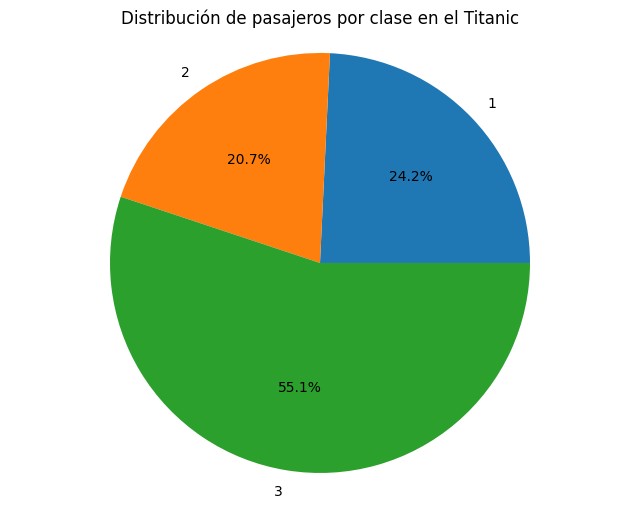

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic desde Seaborn
df = sns.load_dataset('titanic')
df_grupo = df.groupby('pclass').size().reset_index(name='count')
print(df_grupo)
# gráfico de torta (pie chart)
plt.figure(figsize=(8, 6))
plt.pie(df_grupo['count'], labels=df_grupo['pclass'], autopct='%1.1f%%')
plt.title('Distribución de pasajeros por clase en el Titanic')
plt.axis('equal')
plt.show()


### Identificación y tratamiento de Outliers

Vamos a identificar y tratar los outliers en el conjunto de datos.



Outliers en la columna 'fare':
     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male   NaN      8      2   69.5500        S  Third   
849         1       1  female   NaN      1      0   89.1042        C  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
863         0       3  female   NaN      8      2   69.5500        S  Third   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adult_m

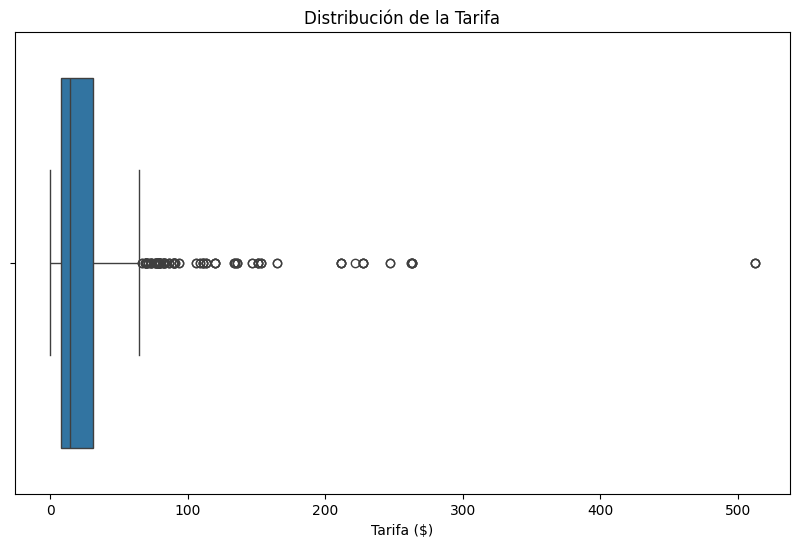

In [20]:
# Identificación de outliers usando el método IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['fare'] < (Q1 - 1.5 * IQR)) | (df['fare'] > (Q3 + 1.5 * IQR))]
print("\nOutliers en la columna 'fare':")
print(outliers)

# Visualización de outliers en un box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='fare', data=df)
plt.title('Distribución de la Tarifa')
plt.xlabel('Tarifa ($)')
plt.show()

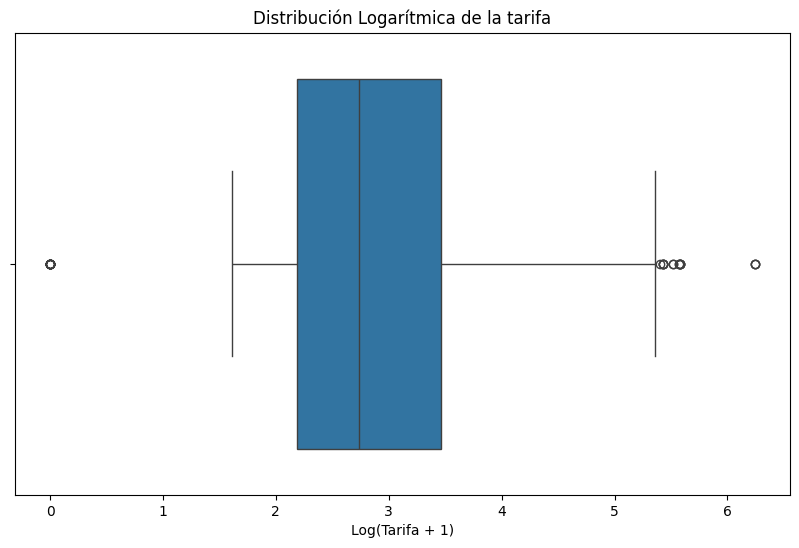

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Aplicar transformación logarítmica
df['fare_log'] = df['fare'].apply(lambda x: np.log(x + 1))  # 1 para evitar log(0)

# Visualización del box plot con transformación logarítmica
plt.figure(figsize=(10, 6))
sns.boxplot(x='fare_log', data=df)
plt.title('Distribución Logarítmica de la tarifa')
plt.xlabel('Log(Tarifa + 1)')
plt.show()


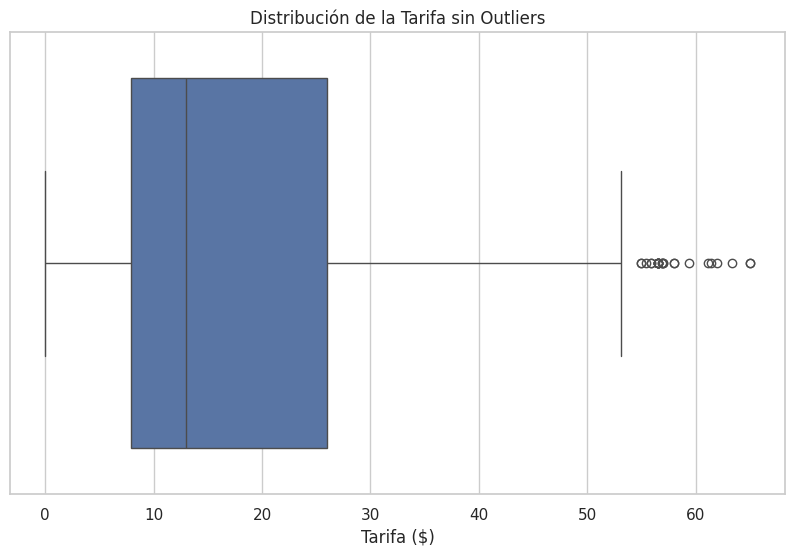

In [ ]:
# Filtrar datos sin outliers
df_no_outliers = df[(df['fare'] >= (Q1 - 1.5 * IQR)) & (df['fare'] <= (Q3 + 1.5 * IQR))]

# Visualización del box plot sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='fare', data=df_no_outliers)
plt.title('Distribución de la Tarifa sin outliers')
plt.xlabel('Tarifa ($)')
plt.show()


### Normalización y escalado

Vamos a normalizar y escalar los datos numéricos.


In [24]:
# Estandarización (Z-score) de la columna 'age'
df['age_standardized'] = (df['age'] - ???) / df['age'].std()

### TODO: Verifica los valores estadísticos después de la estandarización de la columna 'age'.
# Imprime la media y la desviación estándar de la columna 'age_standardized' para confirmar.

# Normalización de la columna 'age' (Min-Max Scaling)
df['age_normalized'] = (df['age'] - df['age'].min()) / ???)

# Escalado de la columna 'fare' usando Z-score
# Similar a 'age', escalamos 'fare' para que tenga media 0 y desviación estándar 1.
df['fare_scaled'] =???

print("\nDataFrame después de la normalización y el escalado:")
print(df[['age', 'age_normalized', 'fare', 'fare_scaled']].head())


Media de age_standardized: 0.00
Desviación estándar de age_standardized: 1.00
Valor mínimo de age_normalized: 0.00
Valor máximo de age_normalized: 1.00

DataFrame después de la normalización y el escalado:
    age  age_normalized     fare  fare_scaled
0  22.0        0.271174   7.2500    -0.502163
1  38.0        0.472229  71.2833     0.786404
2  26.0        0.321438   7.9250    -0.488580
3  35.0        0.434531  53.1000     0.420494
4  35.0        0.434531   8.0500    -0.486064


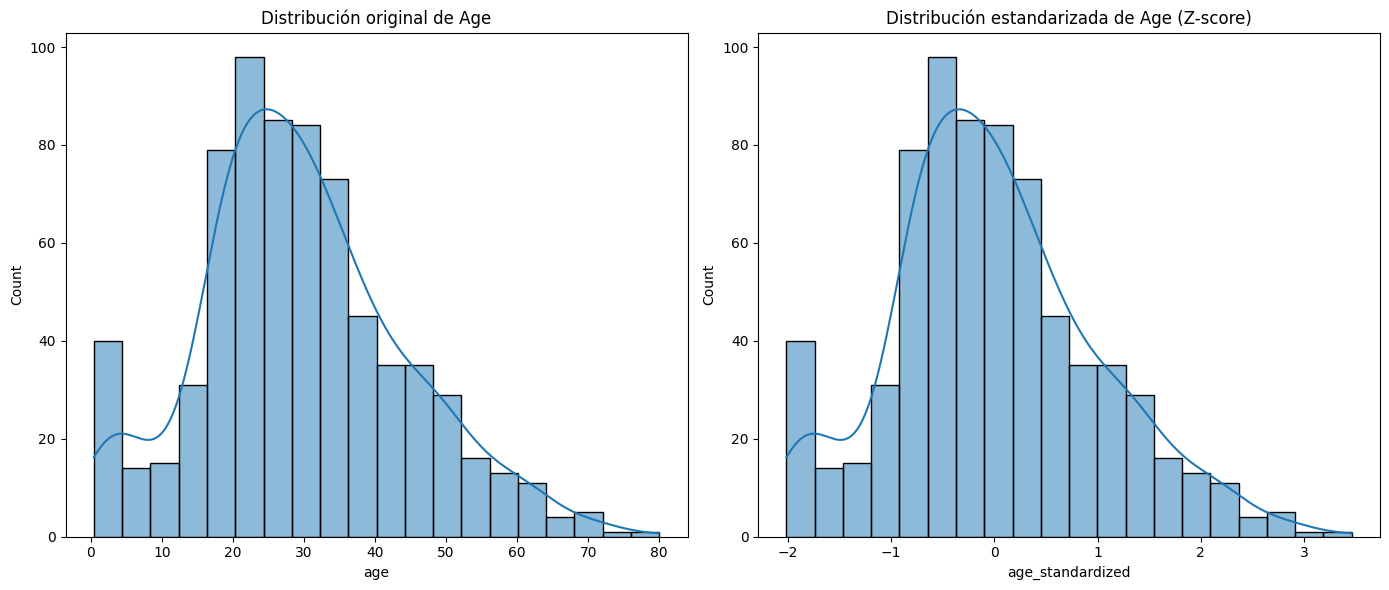

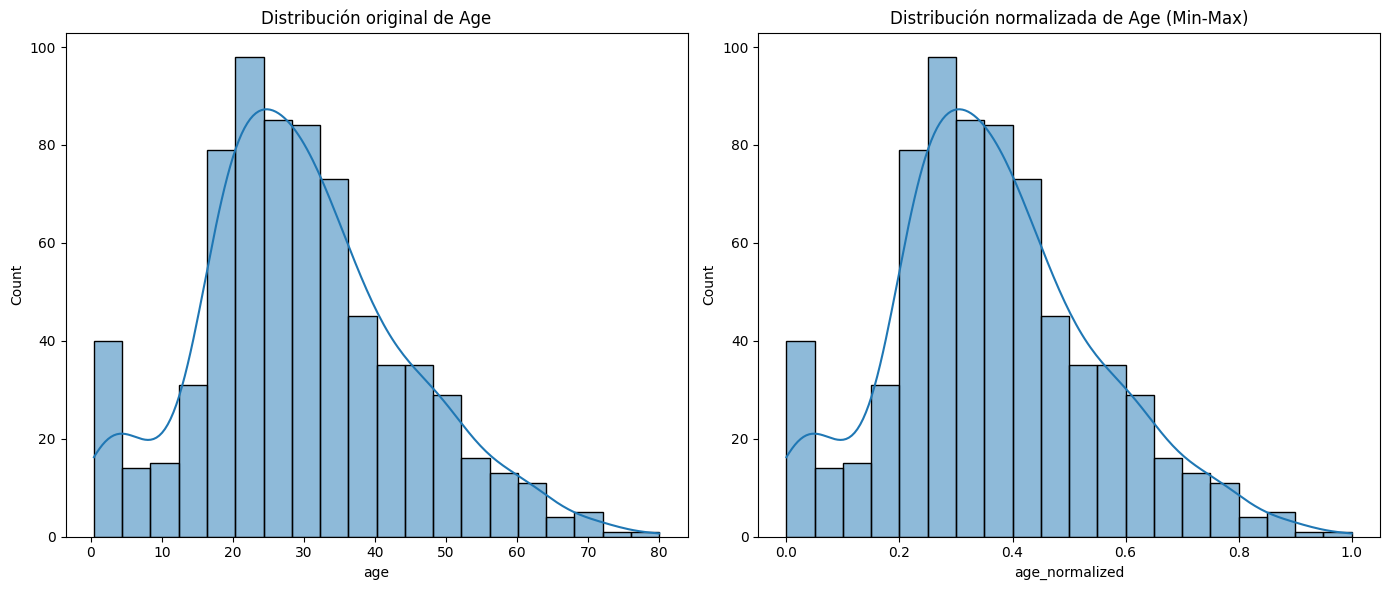

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico para comparar 'age' original y 'age_standardized'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True) #kde crea una curva suave
plt.title('Distribución original de Age')

plt.subplot(1, 2, 2)
sns.histplot(df['age_standardized'], kde=True)
plt.title('Distribución estandarizada de Age (Z-score)')

plt.tight_layout()
plt.show()

### TODO: Realiza un gráfico para visualizar la distribución de 'age' y 'age_normalized'.
???

### Discretización

Vamos a categorizar la columna 'age'.


In [ ]:
# Discretización de la columna 'age'
df['age_binned'] = pd.cut(df['age'], bins=[0, 12, 18, 60, 120], labels=['Niño', 'Adolescente', 'Adulto', 'Anciano'])
print("\nDataFrame después de la discretización:")
print(df[['age', 'age_binned']].head())



DataFrame después de la discretización:
    age age_binned
0  22.0     Adulto
1  38.0     Adulto
2  26.0     Adulto
3  35.0     Adulto
4  35.0     Adulto


### Transformaciones matemáticas en Python

Vamos a aplicar algunas transformaciones matemáticas a las columnas numéricas.


In [ ]:
# Transformación de raíz cuadrada de la columna 'age'
df['age_sqrt'] = np.sqrt(df['age']) #tambien reduce la amplitud, es más util en valores en valores no tan sesgados

print("\nDataFrame después de las transformaciones matemáticas:")
print(df[['fare', 'fare_log', 'age', 'age_sqrt']].head())



DataFrame después de las transformaciones matemáticas:
      fare  fare_log   age  age_sqrt
0   7.2500  2.110213  22.0  4.690416
1  71.2833  4.280593  38.0  6.164414
2   7.9250  2.188856  26.0  5.099020
3  53.1000  3.990834  35.0  5.916080
4   8.0500  2.202765  35.0  5.916080


# Ejercicios

En esta sección, aplicarás lo aprendido sobre evaluación y corrección de datos. Completa los siguientes ejercicios:

## Ejercicio 1: Imputación de datos

1. Carga el conjunto de datos "planets" de Seaborn.
2. Identifica las columnas con valores faltantes y realiza la imputación con la media para las variables numéricas y con la moda para las categóricas.




In [ ]:
import seaborn as sns
import pandas as pd

# Cargar el conjunto de datos `planets`
planets = sns.load_dataset("planets")
print("\nDataFrame de planets:")
print(planets.head())

##TODO Identificar columnas con valores faltantes

##TODO Imputar valores faltantes en las columnas numéricas con la media
## Lista las ventajas, y las desventajas de la solución anterior.

##TODO Imputar valores faltantes en las columnas categóricas con la moda
## Lista las ventajas, y las desventajas de la solución anterior.




DataFrame de planets:
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

Valores faltantes por columna:
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Valores faltantes después de la imputación:
method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64


## Ejercicio 2: Tratamiento de valores duplicados

 Identifica y elimina las filas duplicadas.



In [ ]:
# Ejercicio 2: Tratamiento de Valores Duplicados

import seaborn as sns
import pandas as pd

##TODO Identificar filas duplicadas

##TODO Eliminar filas duplicadas




DataFrame de planets:
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

Número de filas duplicadas:
4

Número de filas duplicadas después de la eliminación:
0


In [ ]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

## Ejercicio 3: Codificación de variables categóricas

Realiza la codificación de etiquetas para la columna `method`.

Realiza la codificación One-Hot para la columna `method`.



In [ ]:
# Ejercicio 3: Codificación de Variables Categóricas
import seaborn as sns
import pandas as pd

##TODO 2. Codificación de etiquetas para la columna `method`

##TODO 3. Codificación One-Hot para la columna `orbital_period` (o cualquier otra categórica si la hubiera)
# Sin embargo, en este caso, la columna `orbital_period` es numérica, así que escogeremos una columna diferente.
# En este caso, `method` es la única columna categórica en planets.

# Para demostrar la codificación One-Hot, volveremos a convertir 'method' a una categoría antes de aplicar get_dummies


print("\nDataFrame después de la codificación de variables categóricas:")
print(planets.head())



DataFrame después de la codificación de variables categóricas:
   number  orbital_period   mass  distance  year  method_1  method_2  \
0       1         269.300   7.10     77.40  2006     False     False   
1       1         874.774   2.21     56.95  2008     False     False   
2       1         763.000   2.60     19.84  2011     False     False   
3       1         326.030  19.40    110.62  2007     False     False   
4       1         516.220  10.50    119.47  2009     False     False   

   method_3  method_4  method_5  method_6  method_7  method_8  method_9  
0     False     False     False     False      True     False     False  
1     False     False     False     False      True     False     False  
2     False     False     False     False      True     False     False  
3     False     False     False     False      True     False     False  
4     False     False     False     False      True     False     False  


## Ejercicio 4: Identificación y tratamiento de Outliers

Identifica los outliers en la columna `orbital_period` usando el método IQR y visualízalos en un box plot.




Outliers en la columna 'orbital_period':
                        method  number  orbital_period  mass  distance  year
6              Radial Velocity       1          1773.4  4.64     18.15  2002
14             Radial Velocity       3          2391.0  0.54     14.08  2001
15             Radial Velocity       3         14002.0  1.64     14.08  2009
19             Radial Velocity       5          4909.0  3.53     12.53  2002
32   Eclipse Timing Variations       1         10220.0  6.05       NaN  2009
..                         ...     ...             ...   ...       ...   ...
920               Microlensing       1          3500.0   NaN       NaN  2005
921               Microlensing       2          1825.0   NaN       NaN  2008
922               Microlensing       2          5100.0   NaN       NaN  2008
937                    Imaging       1        730000.0   NaN       NaN  2006
944              Pulsar Timing       1         36525.0   NaN       NaN  2003

[126 rows x 6 columns]


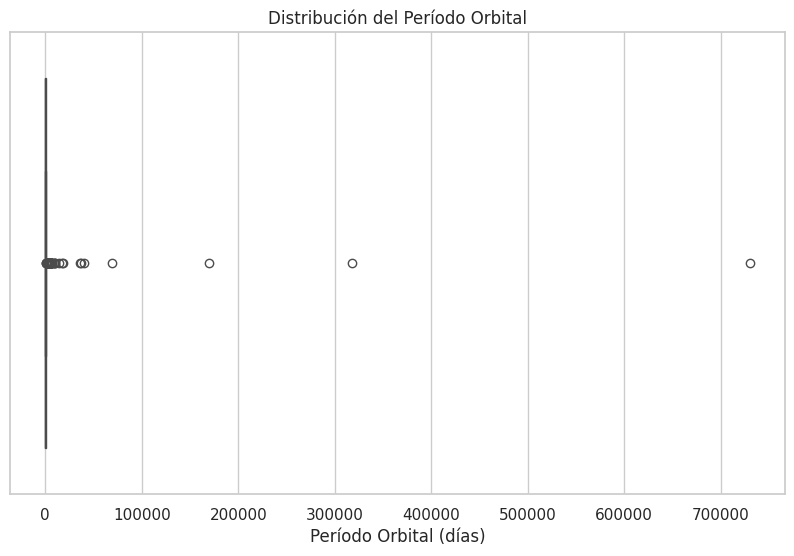

In [ ]:
## Ejercicio 4: Identificación y tratamiento de Outliers

##TODO 2. Identificar outliers en la columna `orbital_period` usando IQR
Q1 = ?
Q3 = ?
IQR = ???

#...

##TODO Visualización de outliers en un box plot



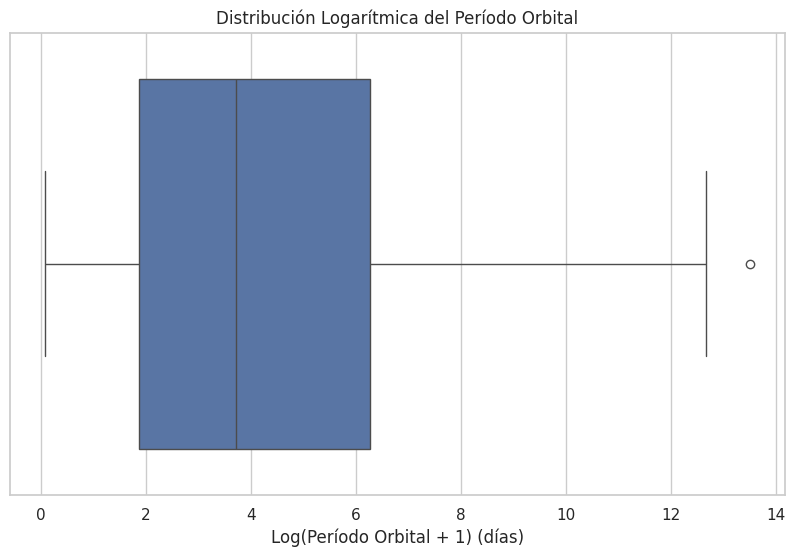

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##TODO Aplicar transformación logarítmica
##TODO ¿Puedes sugerir una función que ya esté integrada?, análoga al proceso que sugerimos?
planets['log_orbital_period'] = np.???  # Añadir 1 para evitar log(0)

# Visualización del box plot con transformación logarítmica


In [ ]:
##TODO: identificas ouliers?
##TODO: Cómo los tratarías? (inputarías), justifique.
##TODO: Codifica tu solución, y luego comparte!

## Ejercicio 5: Normalización y escalado

Normaliza la columna `orbital_period`.

Escala la columna `mass`.



In [30]:
import seaborn as sns
import pandas as pd

# Ejercicio 5: Normalización y Escalado

# 1. Cargar el conjunto de datos `planets`
planets = ?
print("\nDataFrame de planets:")
print(planets.head())

## Normalizar la columna `orbital_period` (normal distribution)

##TODO  Escalar la columna `mass`
##TODO Sugiere una función alternativa - Luego comparte con el equipo!. (Tip: puedes usar otras librerías)





DataFrame de planets:


## Ejercicio 6: Transformaciones matemáticas

Aplica una transformación logarítmica a la columna `orbital_period`.

Aplica una transformación de raíz cuadrada a la columna `distance`.

In [ ]:
# Ejercicio 6: Transformaciones Matemáticas
# Aplicar transformación logarítmica
# Aplicar transformación de raíz cuadrada